# **CH4. 분류**

## **1. 분류(Classification)의 개요**

- **지도학습**: 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
- **분류 (Classification)**
  - 지도학습의 대표적인 유형
  - 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측
  - 즉, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별
  - **분류를 구현할 수 있는 머신러닝 알고리즘**
    - 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
    - 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀
    - 데이터 균일도에 따른 규칙 기반의 결정 트리
    - 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신
    - 근접 거리를 기준으로 하는 최소 근접 알고리즘
    - 심층 연결 기반의 신경망
    - 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 **앙상블(Ensemble)**
      - 대부분은 동일한 알고리즘을 결합함
      - 앙상블은 분류에서 가장 각광 받는 방법 중 하나
      - 이미지, 영상, 음성, NLP 영역을 제외한 정형 데이터의 예측 분석 영역에서 앙상블의 예측 성능이 매우 높음
      - 일반적으로 **배깅(Baggig)** 과 **부스팅(Boosting)** 방식으로 나뉨
        - 랜덤 포레스트(Rnadom Forest)는 배깅 방식의 대표로, 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등의 장점을 가짐
        - BUT 근래의 앙상블 방법은 부스팅 방식으로 지속해서 발전하고 있음
        - 부스팅의 효시 격인 그래디언트 부스팅(Gradient Boosting)의 경우 뛰어난 예측 성능을 가지고 있지만, 수행 시간이 너무 오래 걸리는 단점으로 인해 최적화 모델 튜닝이 어려웠음
        - BUT XgBoost(eXtra Gradient Boost)와 LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘의 등장으로 부스팅이 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리잡음
      - 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것이 **결정 트리**
        - 매우 쉽고 유연하게 적용될 수 있는 알고리즘
        - 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음
        - BUT 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며 이로 인한 과적합 (Overfitting이 발생해 반대로 예측성능이 저하될 수도 있음
        - BUT 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용: 앙상블은 매우 많은 수의 약한 학습기(예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약한 학습기가 되기 때문.
          

## **2. 결정 트리 (Decision Tree)**

- 결정 트리는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
- 학습을 통해 데이터에 있는 규칙을 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것
- 일반적으로 규칙을 가장 쉽게 표현하는 방법은 **if/else**기반으로 나타내는 것
- 데이터의 어떤 기준을 바탕으로 규칙을 만드는지에 따라 분류의 효율성이 달라지기 때문에 알고리즘의 성능을 크게 좌우함

- **규칙노트(Decision Node)**: 규칙 조건
- **리프 노드(Leaf Node)**: 결정된 클래스 값 (결정된 분류 값)
- **서브 트리(Sub Tree)**: 새로운 규칙 조건마다 서브 트리가 생성됨
- 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음: 많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 더욱 복합해진다는 얘기이고 이는 곧 과적합으로 이어지기 쉽기 때문.

- 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙을 정해야 함
- 이를 위해서는 어떻게 트리를 **분할(Split)**할 것인가가 중요한데 최대한 **균일한 데이터 세트를 구성할 수 있도록 분할**하는 것이 필요

- 균일한 데이터 세트란?
  - 데이터 세트의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미침: 균일하지 않은 데이터 세트에서 데이터를 판단하는 데 있어 더 많은 정보 필요
- 결정 노드는 **정보 균일도가 높은 데이터 세트를 먼저 선택**할 수 있도록 규칙 조건을 만듦
- 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식을 자식 트리로 내려가면서 반복
- ex. 박스 안에 30개의 레고 블록이 있는데, 각 레고 블록은 '형태' 속성으로 동그라미, 네모, 세모, '색깔' 속성으로 노랑, 빨강, 파랑을 가지고 이 중 노랑색 블록은 모두 동그라미로 구성되고 빨강과 파랑 블록은 모든 모양이 골고루 섞여 있다면: 각 레고 블록을 형태와 색깔 속성으로 분류하고자 할 때 가장 첫 번째로 만들어져야 하는 규칙 조건은 **if 색깔=='노란색'**: 노란색 블록이면 모두 노란 동그라미 블록으로 가장 쉽게 예측할 수 있고, 그 다음 나머지 블록에 대해 다시 균일도 조건을 찾아 분류하는 것이 가장 효율적이기 때문.
- 이러한 **정보의 균일도를 측정하는 대표적인 방법**: 엔트로피를 이용한 **정보 이득(Information Gain) 지수**와 **지니 계수**
  - **정보 이득**은 엔트로피라는 개념을 기반으로 함. **엔트로피**는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값. 결정 트리는 이 정보 이득 지수로 분할 기준을 결정. 즉, 정보 이득이 높은 속성을 기준으로 분할
  - **지니 계수**는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할.

- 결정 트리 알고리즘을 사이킷런에서 구현한 **DecisionTreeClassifier**는 기본적으로 지니 계수를 이용해 데이터 세트를 분할
- 결정 트리의 일반적인 알고리즘은 데이터 세트를 분할하는 데 가장 좋은 조건, 즉 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류 결정.

### **2.1 결정 트리 모델의 특징**

- 결정 트리의 장점
  - 정보의 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적임
  - 룰이 매우 명확하고 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고, 시각화로 표현까지 할 수 있음
  - 정보의 균일도만 신경 쓰면 되기 때문에 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음
- 결정 트리의 단점
  - 과적합으로 정확도가 떨어짐
  - 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해질 수밖에 없음
  - 복잡한 학습 모델은 결국 실제 상황(테스트 데이터 세트)에 유연하게 대처할 수 없어서 예측 성능이 떨어질 수밖에 없음  
=> 모든 데이터 상황을 만족하는 완벽한 규칙은 만들 수 없다고 먼저 인정하고 트리의 크기를 사전에 지한하는 것이 오히려 더 나은 성능을 보장할 수 있음

### **2.2 결정 트리 파라미터**

- 사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스를 제공
- DecisionTreeClassifier는 분류를 위한 클래스, DecisionTreeRegressor는 회귀를 위한 클래스
- 사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees) 알고리즘 기반
- CART는 분류, 회귀 모두에서 사용될 수 있는 트리 알고리즘

### **2.3 결정 트리 모델의 시각화**

- Graphviz 패키지
  - 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여줌
  - 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지
  - 사이킷런은 Graphviz 패키지와 쉽게 인터페이스할 수 있도록 export_graphviz() API 제공
  - 사이킷런의 export_graphviz()는 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여줌

- Graphviz 설치 후 이를 이용해 붓꽃 데이터 세트에 결정 트리를 적용할 때 어떻게 서브 트리가 구성되고 만들어지는지 시각화해보자.
- 붓꽃 데이터 세트를 DecisionTreeClassifier를 이용해 학습한 뒤 어떠한 형태로 규칙 트리가 만들어지는지 확인해보자.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

- 사이킷런의 트리 모듈은 Graphviz를 이용하기 위해 export_graphviz() 함수 제공
- export_graphviz()는 Graphviz가 읽어 들여서 그래프 형태로 시각화할 수 있는 출력 파일 생성
- export_graphviz()에 인자로 학습이 완료된 estimator, output 파일 명, 결정 클래스의 명칭, 피처의 명칭 입력

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

- 이렇게 생성된 출력 파일 tree.dot을 다음과 같이 Graphviz의 파이썬 래퍼 모듈을 호출해 결정 트리의 규칙을 시각적으로 표현해보자.

In [5]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

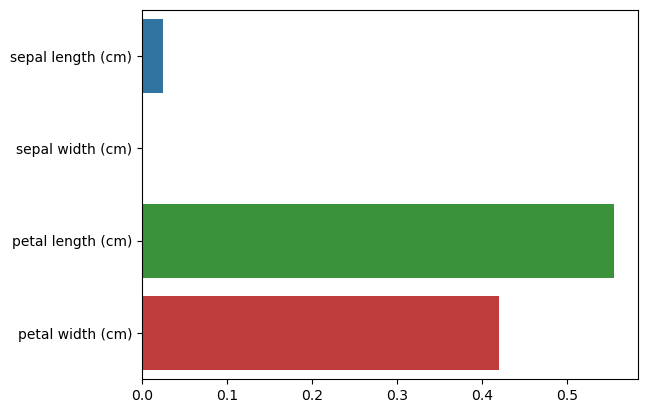

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column별 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### **2.4 결정 트리 과적합(Overfitting)**

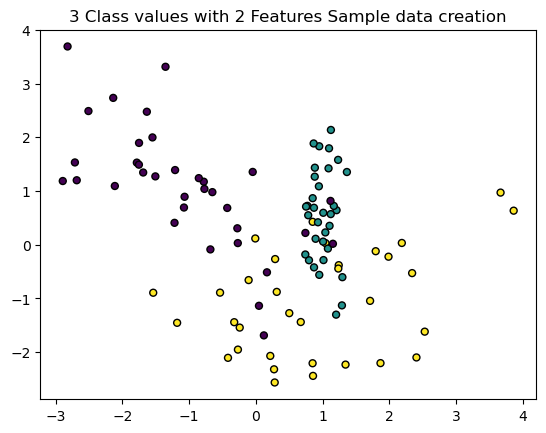

In [9]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해 feature 2개, 결정값 클래스 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개 feature를 2차원 좌표 시각화, 각 클래스값 다른 색깔로 표시.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

In [11]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

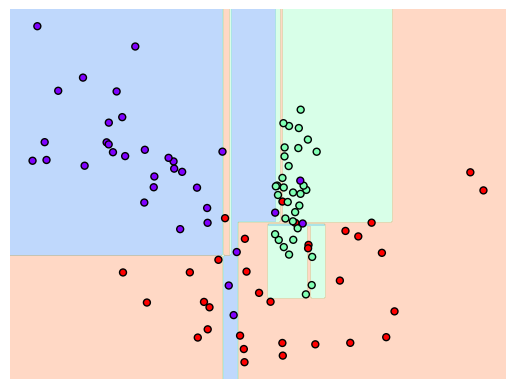

In [12]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

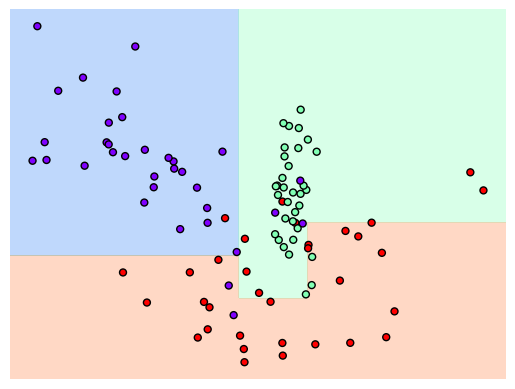

In [15]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### **2.5 결정 트리 실습 - 사용자 행동 인식 데이터 세트**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일: 피처 이름 index, 피처명 공백으로 분리 -> DataFrame으로 로드
feature_name_df = pd.read_csv(r'C:\Users\이희원\OneDrive\문서\UCI HAR Dataset\human_activity\features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index 제거, 피처명만 리스트 객체로 생성 (샘플 10개 추출)
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [20]:
# 중복된 피처명 개수 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [22]:
# 원본 피처명에 _1/_2 추가해 새 DF 반환하는 함수 생성

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [26]:
import pandas as pd

def get_human_dataset( ):

    # 각 데이터 파일: 공백으로 분리 => 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv(r'C:\Users\이희원\OneDrive\문서\UCI HAR Dataset\human_activity\features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

    # 중복된 피처명 수정하는 get_new_feature_name_df() -> 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습/테스트 피처 데이터 DataFrame 로딩. 컬럼명: feature_name
    X_train = pd.read_csv(r"C:\Users\이희원\OneDrive\문서\UCI HAR Dataset\human_activity\train\X_train.txt",sep='\s+', names=feature_name )
    X_test = pd.read_csv(r"C:\Users\이희원\OneDrive\문서\UCI HAR Dataset\human_activity\train\X_train.txt",sep='\s+', names=feature_name)

    # 학습/테스트 레이블 데이터 DataFrame 로딩. 컬럼명: action
    y_train = pd.read_csv(r"C:\Users\이희원\OneDrive\문서\UCI HAR Dataset\human_activity\train\y_train.txt",sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv(r"C:\Users\이희원\OneDrive\문서\UCI HAR Dataset\human_activity\train\y_train.txt",sep='\s+',header=None,names=['action'])

    # 학습/테스트용 DataFrame 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [28]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [29]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 1.0000
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [41]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [42]:
# GridSearchCV 객체의 cv_results_ 속성 DataFrame 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 테스트/학습 데이터 세트 정확도 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [43]:
# 별도의 테스트 데이터 세트에서 max_depth 변화에 따른 값 측정

max_depths = [6,8,10,12,16,20,24]
# max_depth 값 변화시키면서 학습/테스트 세트에서의 예측 성능 측정

for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth={0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth=6 정확도: 0.9434
max_depth=8 정확도: 0.9733
max_depth=10 정확도: 0.9905
max_depth=12 정확도: 0.9961
max_depth=16 정확도: 0.9996
max_depth=20 정확도: 1.0000
max_depth=24 정확도: 1.0000


In [44]:
# max_depth와 min_samples_split 같이 변경하면서 성능 튜닝

params = {'max_depth':[8,12,16,20],
          'min_samples_split':[16,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [45]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.9721


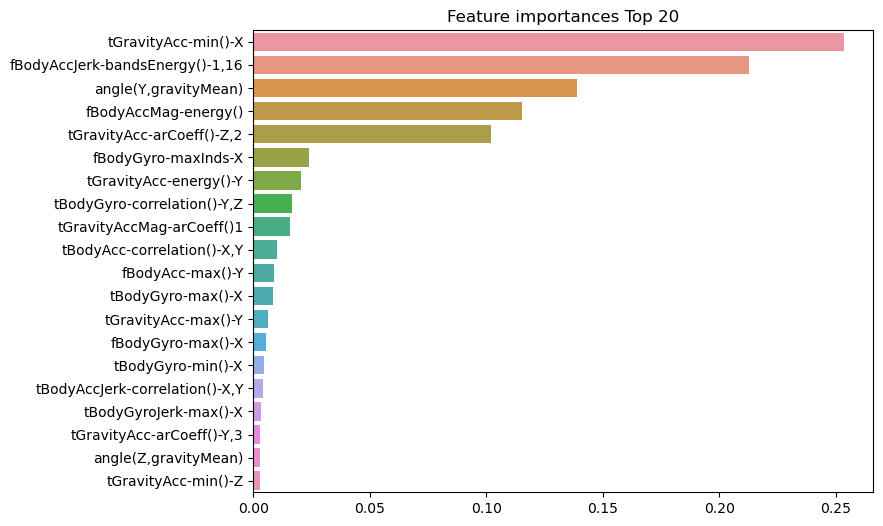

In [46]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도 정렬, Seaborn 막대그래프 표현 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도 순 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()